In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
#question1
dset=pd.read_csv("Salary_Data.csv")         #importing the salary dataset
dset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
X = dset.iloc[:, :-1].values
Y = dset.iloc[:, 1].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=1/3,random_state = 0) #dividing the dataset into training and testing sets

In [7]:
lregression = LinearRegression()
lregression.fit(X_Train, Y_Train)
                                              #fitting the linear regression into the training dataset
Y_Pred = lregression.predict(X_Test)

In [8]:
mean_squared_error(Y_Test,Y_Pred)             #calculating the mean squared error

21026037.329511296

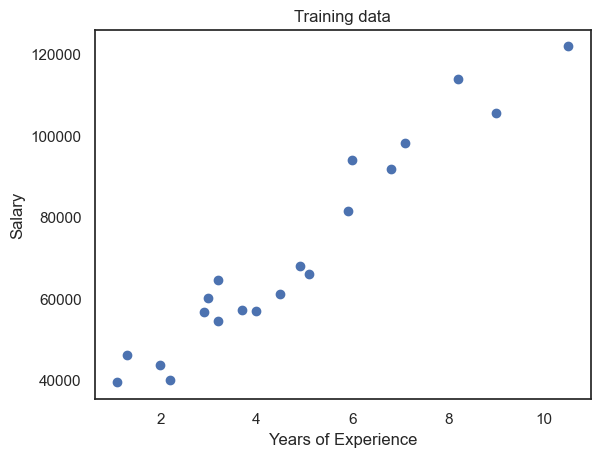

In [9]:
plt.title('Training data')                     #visualizing the training data usig the scatterplot
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_Train, Y_Train)
plt.show()

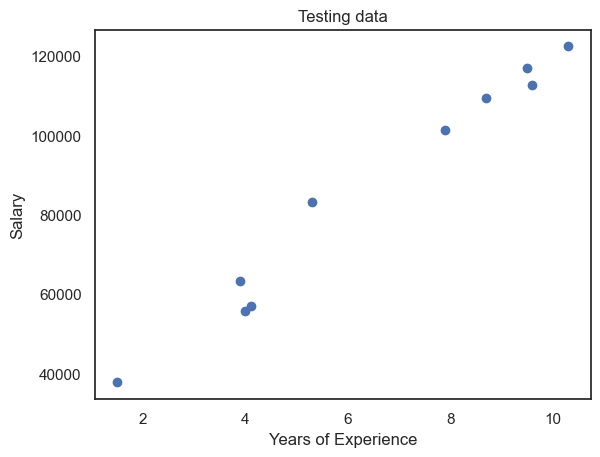

In [10]:
plt.title('Testing data')                     #visualizing the testing data using a scatterplot
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_Test, Y_Test)
plt.show()

In [79]:
#question 2
dkmean=pd.read_csv("K-Mean_Dataset.csv")       #reading the k-mean dataset
dkmean.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [207]:
from sklearn.model_selection import train_test_split
X = dkmean.iloc[:, :-1].values                   
Y = dkmean.iloc[:, 1].values                    #splitting the train and the test data
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [208]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dkmean['CUST_ID'] = le.fit_transform(dkmean.CUST_ID.values)

In [209]:
Xrn=dkmean.fillna(dkmean.mean())                   #filling the null values with mean

In [210]:
#elbow method
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(Xrn)
    wcss.append(kmeans.inertia_)



In [211]:
from sklearn.cluster import KMeans      #using Kmeans algorithm
nclusters = 2
km = KMeans(n_clusters=nclusters)
km.fit(Xrn)


KMeans(n_clusters=2)

In [212]:
y_kmeans = km.predict(Xrn)


In [213]:
from sklearn import metrics                             #finding the silhouette score
silscore = metrics.silhouette_score(Xrn, y_kmeans)
print("silhouette score is:",silscore)

silhouette score is: 0.4272072267584384


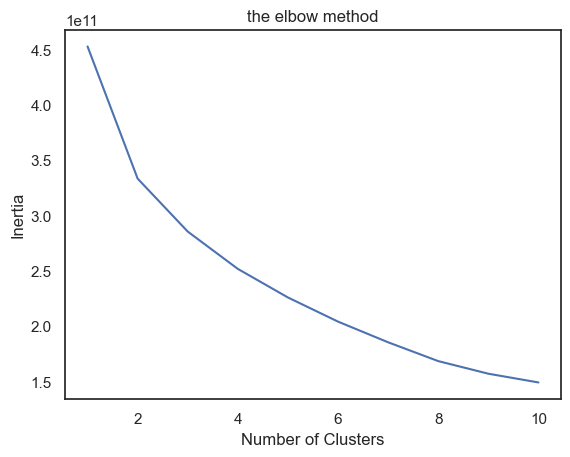

In [217]:
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [214]:
from sklearn import preprocessing                     #feaure scaling the data and finding the silhouette score
scaler = preprocessing.StandardScaler()
scaler.fit(Xrn)
X_scaled_array = scaler.transform(Xrn)
X_scaled = pd.DataFrame(X_scaled_array, columns = Xrn.columns)

In [215]:
from sklearn.cluster import KMeans
wcs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_scaled)
    wcs.append(kmeans.inertia_)

In [216]:
nclusters = 2
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)
KMeans(n_clusters=2)
y_cluster_kmeans = km.predict(X_scaled)
silscore = metrics.silhouette_score(X_scaled, y_kmeans)
print("silhouette score",silscore)

silhouette score 0.24651827633808382
